In [1]:
%matplotlib inline

In [2]:
from BPTK_Py.bptk import bptk

bptk = bptk()

Output()

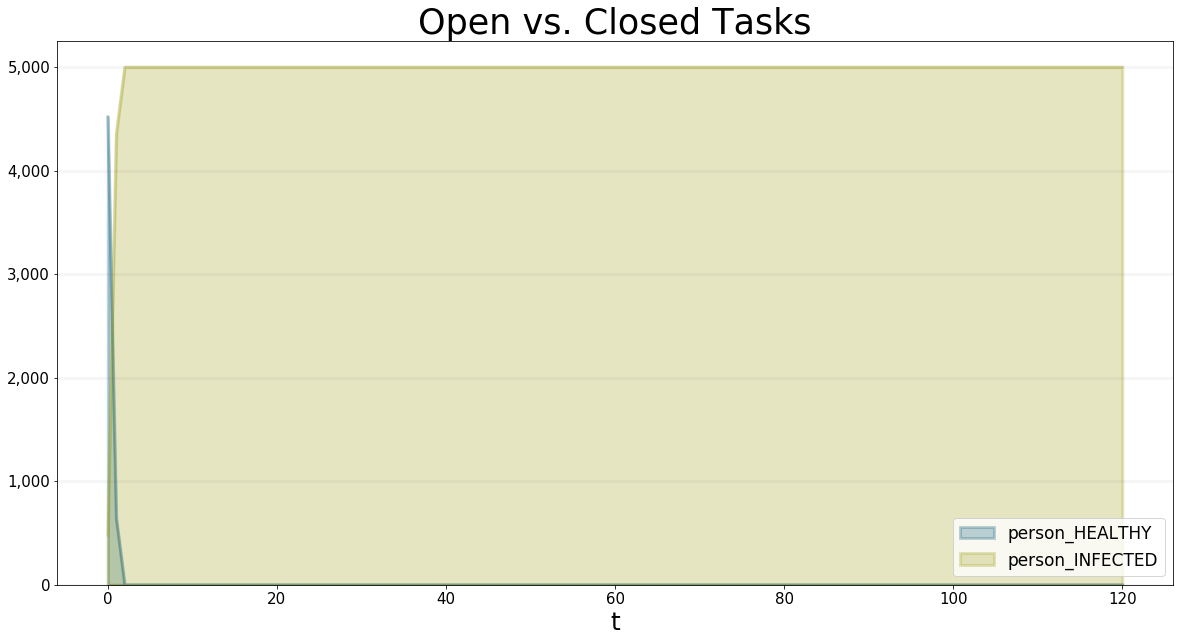

In [4]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Open vs. Closed Tasks",
    scenarios=["scenario80"],
    agents=["person"],#,agent_properties=["infected"],agent_property_types=["total"],
    agent_states=["HEALTHY","INFECTED"],progress_bar=True
)

'/Users/stefaniequach/Projects/Intern/sim-covid-19/abm'